In [1]:
import pandas as pd
dataset = pd.read_csv('/home/aaditya/Ml/Machine Learning A-Z/Part 4 - Clustering/Section 24 - K-Means Clustering/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
X = dataset.iloc[:, [3,4]].values

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Mylist = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10, random_state = 0)
    kmeans.fit(X)
    Mylist.append(kmeans.inertia_)
plt.plot(range(1,11), Mylist)
plt.title('K value Finder')
plt.xlabel('Number of clusters')
plt.ylabel('My_list')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
kmeans = KMeans(n_clusters=5,init = 'k-means++', max_iter=300, n_init=10, random_state=0 )
y_means= kmeans.fit_predict(X)

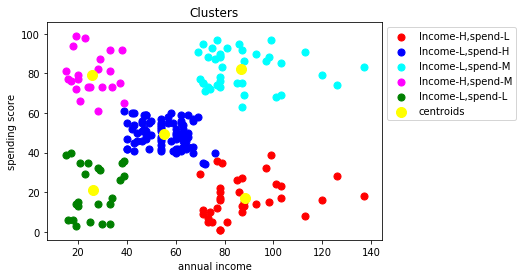

In [5]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], s = 50, c = 'red', label = 'Income-H,spend-L')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], s = 50, c = 'blue', label = 'Income-L,spend-H')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], s = 50, c = 'cyan', label = 'Income-L,spend-M')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], s = 50, c = 'magenta', label = 'Income-H,spend-M')
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], s = 50, c = 'green', label = 'Income-L,spend-L')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label='centroids')
plt.title('Clusters')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [28]:
predicted_data = pd.DataFrame(y_means)
newdata = dataset.join(predicted_data, how='left')
result = newdata.rename(columns={0:'Predicted_Result'})
